# Mesquite Class Science Fair 2018-2019: Data Analysis

## Notebook Setup

In [1]:
%matplotlib inline

In [2]:
import os
import pandas
import seaborn as sns

## Read Data

In [55]:
PRE = 'pre'
POST = 'post'

treatments = [
    'control',
    'water',
    'water_stirring',
    'vermiculture',
]

select_keys = ['Material', 'Treatment']
quant_keys = ['Weight (g)', 'Size 1 (cm)', 'Size 2 (cm)', 'Size 3 (cm)']

all_data_parts = {
    PRE: {},
    POST: {},
}

for stage in [PRE, POST]:
    parts = []
    for t in treatments:
        d = pandas.read_csv(os.path.join('data', stage, t+'.csv'),
                           )#index_col=0)
        d['Treatment'] = t
        d = d[select_keys + quant_keys]
        d.rename(index=str, columns={
            'Weight (g)': 'weight_' + stage,
            'Size 1 (cm)': 'size_1_' + stage,
            'Size 2 (cm)': 'size_2_' + stage,
            'Size 3 (cm)': 'size_3_' + stage,

        }, inplace=True)
        parts.append(d)
        all_data_parts[stage][t] = d
        
pre = pandas.concat(all_data_parts[PRE].values())
post = pandas.concat(all_data_parts[POST].values())
all = pandas.merge(pre, post, on=['Material', 'Treatment'])

In [70]:
materials = set(all.Material.values)
def select_material(m):
    return all.loc[all['Material'] == m]

In [68]:
sns.set_context('paper')

## Analysis
Now we have all the measurements in memory. We just need to visualize them in a way that reveals any changes. 

First, let's look at the raw data.

In [71]:
all.head()

,Material,Treatment,weight_pre,size_1_pre,size_2_pre,size_3_pre,weight_post,size_1_post,size_2_post,size_3_post,weight_pct_change
0,Aluminum foil,control,2.5,23.3,16.1,NaN,1.8,5.0,3.0,NaN,-28.000000
1,Apple,control,56.0,7.0,3.3,NaN,62.0,8.0,4.0,NaN,10.714286
2,Biodegradable plastic bag,control,1.6,38.0,23.1,NaN,1.0,28.0,22.0,NaN,-37.500000
3,Card stock,control,4.1,14.3,11.9,NaN,3.2,14.0,11.0,NaN,-21.951220
4,Cucumber,control,59.6,5.4,4.0,NaN,54.5,5.0,3.5,NaN,-8.557047


In [72]:
all.tail()

,Material,Treatment,weight_pre,size_1_pre,size_2_pre,size_3_pre,weight_post,size_1_post,size_2_post,size_3_post,weight_pct_change
35,Fabric,vermiculture,2.0,3.7,3.7,4.5,2.8,4.0,4.0,4.0,40.000000
36,Newspaper,vermiculture,6.2,55.0,24.0,6.0,4.2,10.5,9.5,NaN,-32.258065
37,Normal plastic bag,vermiculture,NaN,26.9,14.0,6.0,1.5,24.0,NaN,NaN,NaN
38,Plastic bowl,vermiculture,6.8,10.0,4.5,NaN,6.4,11.0,11.0,5.0,-5.882353
39,Wooden popsicle stick,vermiculture,2.7,15.0,1.7,0.1,3.3,15.0,2.0,NaN,22.222222


What happens if we plot all the weights?

In [73]:
p = sns.relplot(x='Material', y=['weight_pre', 'weight_post'], hue='Treatment', data=all)
#p.savefig('all.pdf')

ValueError: could not broadcast input array from shape (2) into shape (40)

Hard to make sense of! Let's try looking at just one material.

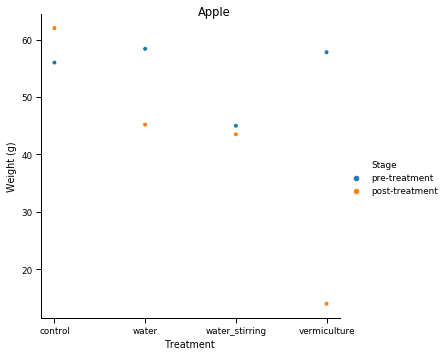

In [32]:
m = 'Apple'
p = sns.relplot(x='Treatment', y='Weight (g)', hue='Stage', data=select_material(m))
p.fig.suptitle(m);

This is easier to understand. Let's look at all the materials that way.

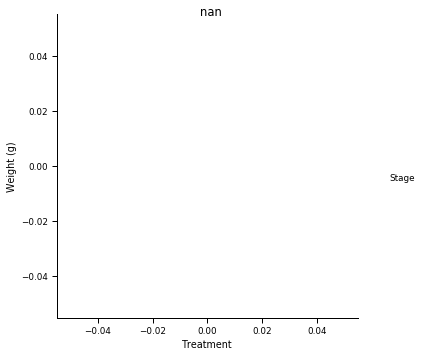

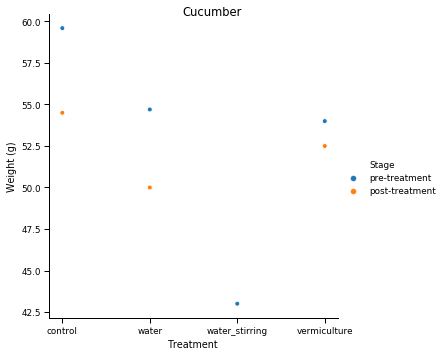

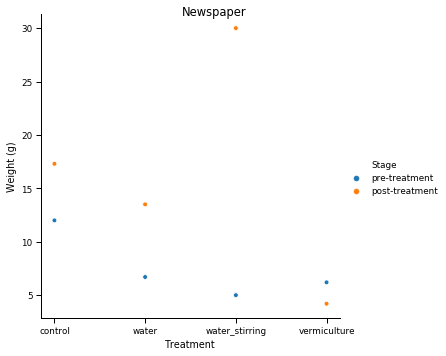

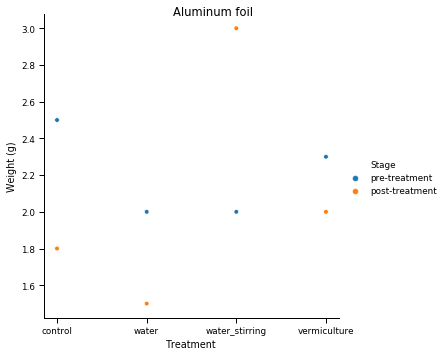

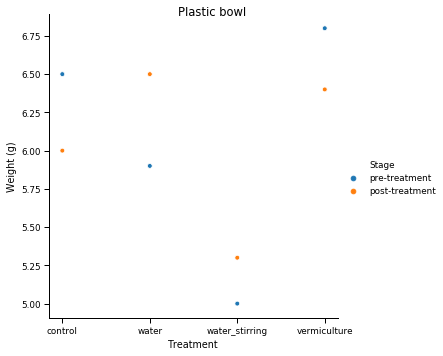

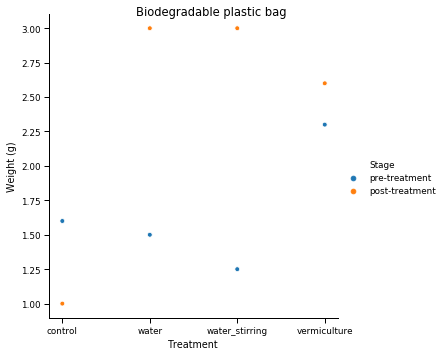

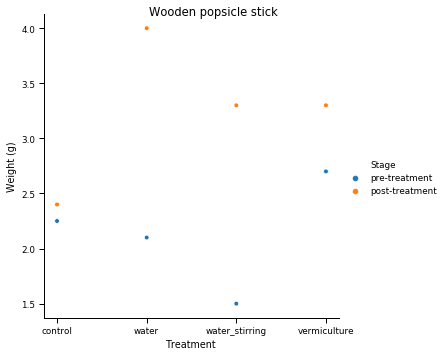

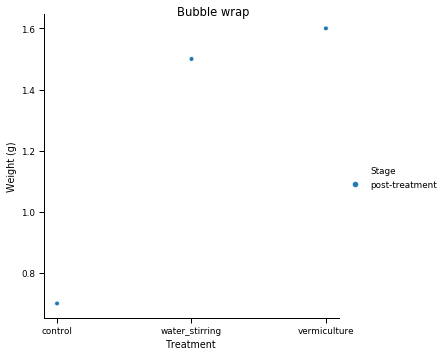

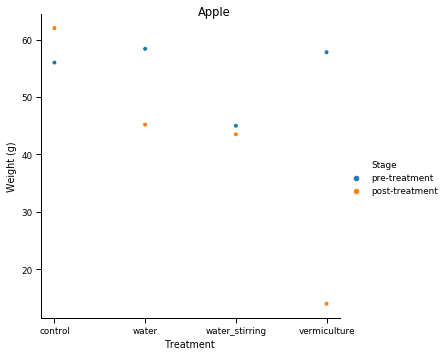

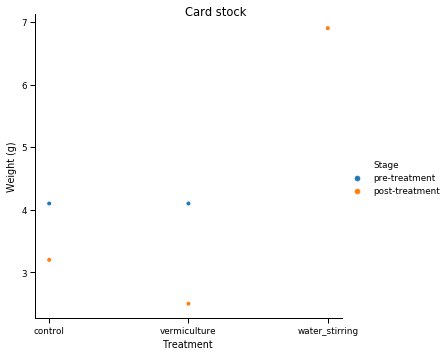

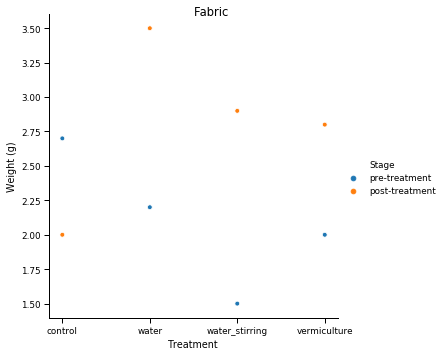

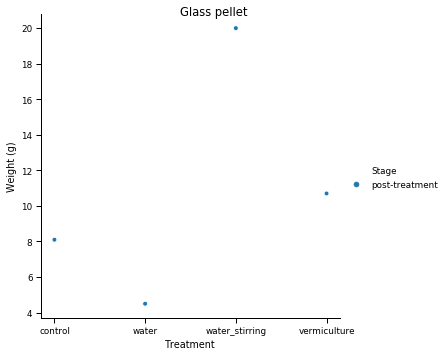

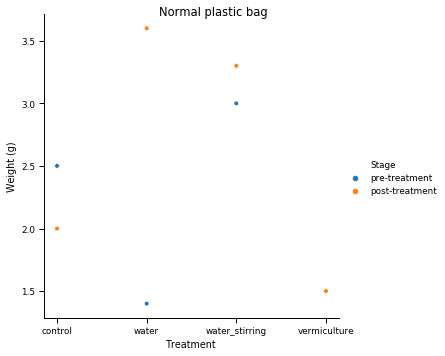

In [33]:
for m in materials:
    sns.relplot(x='Treatment', y='Weight (g)', hue='Stage', data=select_material(m)).fig.suptitle(m)

There are some trends we can compare, but since everything is a different size, it's still hard to draw conclusions. Let's see if percentages clarify anything. 

In [43]:
s = select_material('Apple').pivot(index='Treatment', values=['Weight (g)', 'Size 1 (cm)'], columns='Stage')
s.sort_index(ascending=False, axis=1)

Weight (g)                  Size 1 (cm)               
Stage          pre-treatment post-treatment pre-treatment post-treatment
Treatment                                                               
control                 56.0           62.0           7.0            8.0
vermiculture            57.8           14.0           6.8            5.5
water                   58.4           45.2           7.0            4.0
water_stirring          45.0           43.5           4.0            7.0

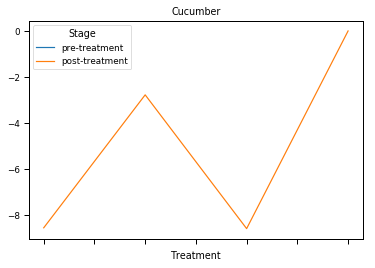

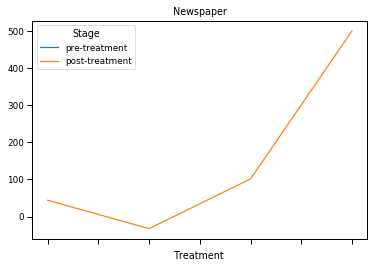

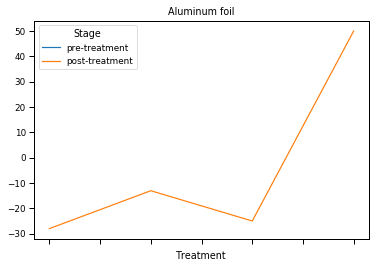

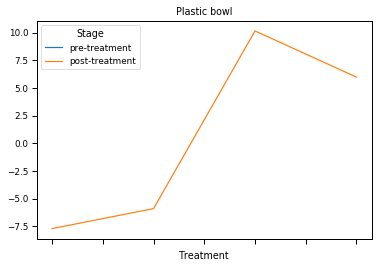

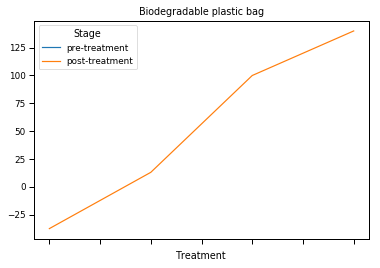

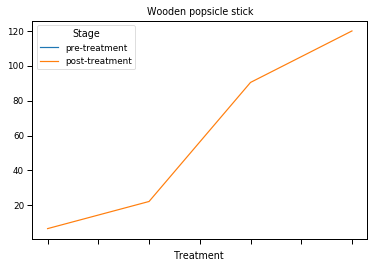

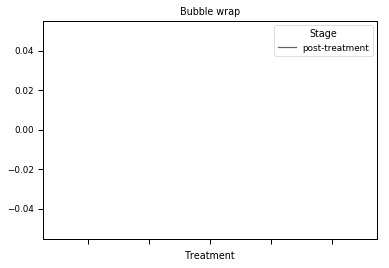

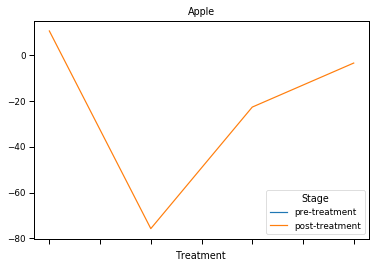

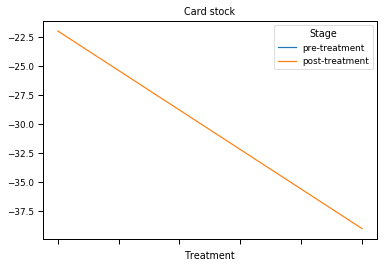

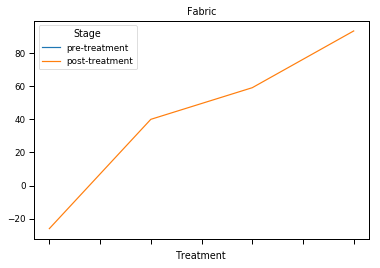

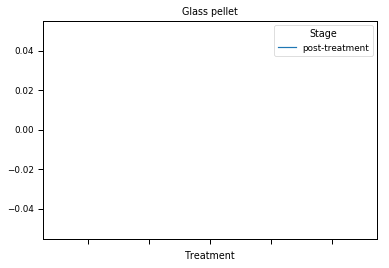

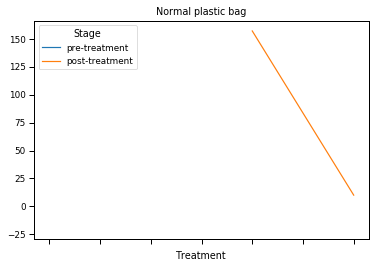

In [23]:
for m in materials:
    d = select_material(m).pivot(index='Treatment', values='Weight (g)', columns='Stage').sort_index(ascending=False, axis=1).pct_change(axis=1)*100
    try:
        p = d.plot()
    except:
        pass
    p.set_title(m)
